In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('car_prices.csv')
print(df.head())

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors ameri

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB
None


In [4]:
print(df.describe())

                year      condition       odometer            mmr  \
count  558837.000000  547017.000000  558743.000000  558799.000000   
mean     2010.038927      30.672365   68320.017767   13769.377495   
std         3.966864      13.402832   53398.542821    9679.967174   
min      1982.000000       1.000000       1.000000      25.000000   
25%      2007.000000      23.000000   28371.000000    7100.000000   
50%      2012.000000      35.000000   52254.000000   12250.000000   
75%      2013.000000      42.000000   99109.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
count  558825.000000  
mean    13611.358810  
std      9749.501628  
min         1.000000  
25%      6900.000000  
50%     12100.000000  
75%     18200.000000  
max    230000.000000  


In [5]:
nan_counts = df.isna().sum()
print(nan_counts)

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [6]:
df['model'].value_counts(dropna=False)

model
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: count, Length: 974, dtype: int64

In [7]:
df.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

In [8]:
print(df['color'].unique())

['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' '—' 'gold' 'yellow' 'green' 'charcoal' nan 'orange'
 'off-white' 'turquoise' 'pink' 'lime' '4802' '9410' '1167' '2172' '14872'
 '12655' '15719' '6388' '16633' '11034' '2711' '6864' '339' '18384' '9887'
 '9837' '20379' '20627' '721' '6158' '2817' '5705' '18561' '2846' '9562'
 '5001']


In [9]:
df = df.drop_duplicates()

In [10]:
df = df.loc[df['color'] != '—']

In [11]:
df = df.dropna()
print(df.isna().sum())

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


In [12]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [13]:
df1 = df[['year', 'condition', 'odometer', 'mmr', 'sellingprice']]
scaler = MinMaxScaler()
scaler.fit(df1)
print(scaler.data_max_)
print(scaler.transform(df1))

scaled_data = scaler.fit_transform(df1)

df2 = pd.DataFrame(scaled_data, columns=df1.columns)

print(df2)


[2.01500e+03 4.90000e+01 9.99999e+05 1.82000e+05 2.30000e+05]
[[1.         0.08333333 0.01663803 0.11251546 0.09347432]
 [1.         0.08333333 0.00939202 0.11416403 0.09347432]
 [0.96       0.91666667 0.00133    0.17516142 0.130431  ]
 ...
 [0.88       0.97916667 0.0505601  0.16362138 0.14782238]
 [1.         0.77083333 0.01665703 0.08284105 0.04825673]
 [0.96       0.6875     0.01500703 0.16252232 0.11608311]]
        year  condition  odometer       mmr  sellingprice
0       1.00   0.083333  0.016638  0.112515      0.093474
1       1.00   0.083333  0.009392  0.114164      0.093474
2       0.96   0.916667  0.001330  0.175161      0.130431
3       1.00   0.833333  0.014281  0.150982      0.120648
4       0.96   0.875000  0.002640  0.362550      0.291301
...      ...        ...       ...       ...           ...
450252  0.84   0.791667  0.066402  0.111416      0.099127
450253  0.88   0.083333  0.054392  0.165819      0.133909
450254  0.88   0.979167  0.050560  0.163621      0.147822
4502

#### DATA VISUALISATION

<Axes: xlabel='color'>

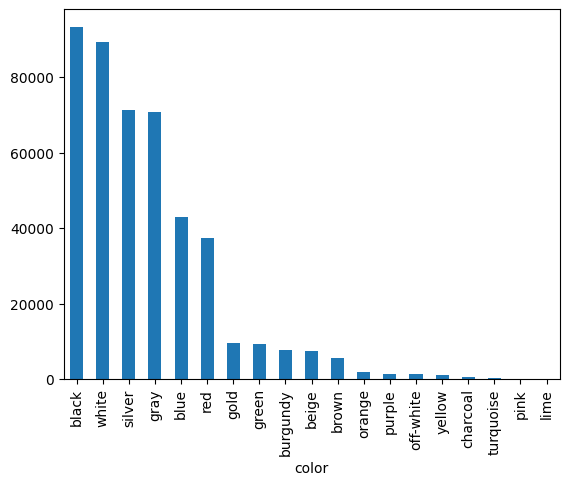

In [14]:
df['color'].value_counts().plot.bar()

<Axes: xlabel='make'>

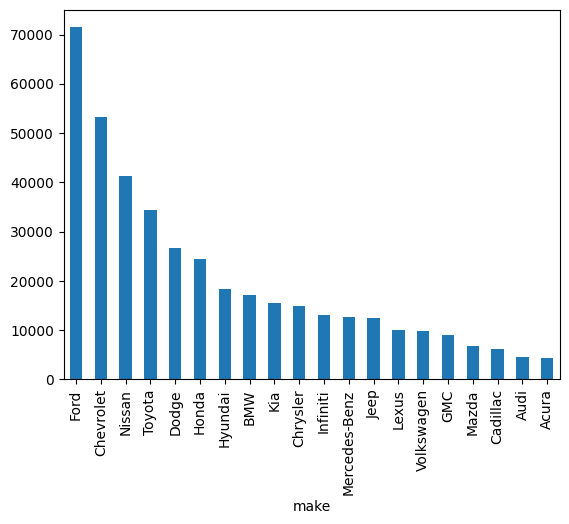

In [15]:
counts = df['make'].value_counts()
top_counts = counts.head(20)
top_counts.plot.bar()

<Axes: xlabel='color'>

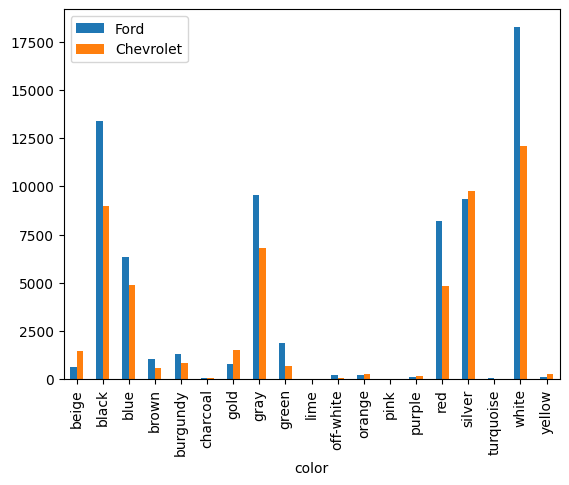

In [16]:
df_ford = df.loc[df['make'] == 'Ford']
ford_colors = df_ford['color'].value_counts()

df_chev = df.loc[df['make'] == 'Chevrolet']
chev_colors = df_chev['color'].value_counts()

colors_comparison = pd.DataFrame(data={'Ford': ford_colors, 'Chevrolet': chev_colors})
colors_comparison.plot.bar()
# print(colors_comparison)